In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rivabar as rb

%matplotlib qt

## Branco River, Brazil - single Landsat TIF file

* link to data file: https://www.dropbox.com/s/aa7eq8ky0y1wryl/LC08_232060_20140219.tif?dl=0

In [2]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Branco/'
fname = 'LC08_232060_20140219.tif'
start_x = 675796.2
start_y = 98338.8
end_x = 628190.3
end_y = -91886.6

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
        rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
        file_type='single_tif', ratio = 20,\
        ch_belt_smooth_factor=1e8, n_pixels_per_channel = 10, 
        remove_smaller_components=True, delete_pixels_polys = False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)

rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

reading Landsat data


100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.48s/it]


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 63/63 [00:00<00:00, 6238.28it/s]


creating linestrings for primal graph


65it [00:00, 107.81it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 7106/7106 [00:00<00:00, 32693.06it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████| 63/63 [00:06<00:00,  9.94it/s]


setting half channel widths


100%|████████████████████████████████████| 6746/6746 [00:00<00:00, 30543.02it/s]


### Plot width data for main channel

In [3]:
# plot width data for main channel
plt.figure()
plt.plot(s, (np.array(w1l)+np.array(w2l))*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot banks and centerline for main channel

In [4]:
plt.figure()
plt.plot(x, y)
plt.plot(x_utm1, y_utm1)
plt.plot(x_utm2, y_utm2)
plt.axis('equal');

### Save results to shapefiles

In [ ]:
rb.save_shapefiles(dirname, fname, G_rook, gdf2, fname_add_on='')

### Display an image band in UTM coordinates

The cell below is an example of how you can load the first band from a raster file and display it in UTM coordinate space (so that you can use 'ginput' to get start_x, start_y, end_x, end_y). Ideally this raster is already an mndwi file so that the channels are more obvious.

In [4]:
from importlib import reload
reload(rb)
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Branco/'
fname = 'LC08_232060_20140219.tif'
im, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y = rb.read_and_plot_im(dirname, fname)

## Mamore River, Bolivia - Landsat bands

* link to data folder: https://www.dropbox.com/scl/fo/k7lhzey6kv6kjux92or5d/h?rlkey=zx8g66sprd6038i5sw5xkixgi&dl=0

In [6]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Bolivia/Mamore/'
fname = 'LC08_L1TP_232071_20160616_20170324_01_T1'
start_x = 303810
start_y = -1851620
end_x = 285603
end_y = -1666131

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='multiple_tifs', ratio = 10,\
                ch_belt_smooth_factor=1e8, n_pixels_per_channel = 2, 
                remove_smaller_components=False, delete_pixels_polys = False)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

reading Landsat data


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 11.84it/s]


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 5420.40it/s]


creating linestrings for primal graph


12it [00:00, 102.68it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████| 13907/13907 [00:00<00:00, 40751.58it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 10.26it/s]


setting half channel widths


100%|██████████████████████████████████| 13449/13449 [00:00<00:00, 40533.34it/s]


### Plot width data for main channel

In [7]:
plt.figure()
plt.plot(s, np.array(w)*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot meander wavelength and channel width data

In [10]:
fig, ax = plt.subplots()
plt.imshow(mndwi, extent=[left_utm_x, right_utm_x, lower_utm_y, upper_utm_y], cmap='gray_r', alpha=0.5)
df = rb.analyze_width_and_wavelength(D_primal, edge_path, ax, delta_s=5, smoothing_factor=0.5*1e7, min_sinuosity=1.1, dx=30)
df.head()

,wavelengths (m),sinuosities,mean widths (m),std. dev. of widths (m),along-channel distance (km)
0,2341.471672,1.318817,295.765688,61.875644,0.941263
1,5104.628118,1.202831,261.667942,85.122023,3.418928
2,2596.847340,2.042607,162.393540,31.244930,9.221460
3,4311.836920,1.204874,202.713648,43.140583,12.870490
4,5412.782080,1.742643,220.911595,42.964761,17.900541


## Brahmaputra River, India / Bangladesh - Landsat bands

* link to data folder: https://www.dropbox.com/scl/fo/wqb8z30wgor3vwg19bdeq/h?rlkey=pq0vxqabhxwnf2rxs07sjk8o1&dl=0

In [11]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Brahmaputra_2/'
fname = 'LC08_L1TP_138042_20190114_20190131_01_T1'
start_x = 859250.5
start_y = 2903119.2
end_x = 767358.1
end_y = 2776067.9

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='multiple_tifs', ratio = 20,\
                ch_belt_smooth_factor=1e8, n_pixels_per_channel = 40, remove_smaller_components=True, 
                                      mndwi_threshold = 0.01)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

reading Landsat data


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  9.76it/s]


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 297/297 [00:00<00:00, 5889.96it/s]


creating linestrings for primal graph


299it [00:13, 22.36it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 6437/6437 [00:00<00:00, 27182.24it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 297/297 [00:29<00:00, 10.22it/s]


setting half channel widths


100%|████████████████████████████████████| 6611/6611 [00:00<00:00, 22286.05it/s]


### Exceedance probability plot of island areas

In [28]:
island_areas = []
channel_areas = []
total_areas = []
degrees = []
lengths = []
for node in G_rook:
    poly1 = G_rook.nodes()[node]['bank_polygon']
    poly2 = G_rook.nodes()[node]['cl_polygon']
    if poly1.area > 0 and poly2.area > poly1.area:
        island_areas.append(poly1.area)
        channel_areas.append(poly2.area - poly1.area)
        total_areas.append(poly2.area)
        degrees.append(G_rook.degree(node))
        lengths.append(poly1.length)
        
island_areas_sorted = np.sort(island_areas)
island_areas_sorted = island_areas_sorted[:-2]
exceedance = 1.-np.arange(1.,len(island_areas_sorted) + 1.)/len(island_areas_sorted)

plt.figure()
plt.loglog(island_areas_sorted, exceedance);

### Histogram of node degree distribution

In [17]:
plt.figure()
n, bins, patches = plt.hist(degrees, bins=np.arange(1.5, 25.6, 1))

plt.bar(np.arange(2,26), n)
plt.xticks(np.arange(2,26))
plt.xlabel('node degree')
plt.ylabel('count')
plt.title('number of neighbors in island neighborhood graph');

## Purus River, MNDWI image generated in Google Earth Engine

* output from GEE needs to be converted to UTM coordinates before running rivabar
* link to data file: https://www.dropbox.com/scl/fi/7bpz3b4eikzdu59cv4bqu/L8_mndwi_Purus_2017_UTM.tif?rlkey=dkv5ykf1xca0jh478yhn6a6im&dl=0

In [29]:
dirname = "/Users/zoltan/Dropbox/Channels/Fluvial/Purus/"
fname = "L8_mndwi_Purus_2017_UTM.tif"
start_x = 363166.2
start_y = -1011937.1
end_x = 1254178.3
end_y = -528280.7

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys = \
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='water_index', ratio = 20, mndwi_threshold=0.1, \
                ch_belt_smooth_factor=1e8, n_pixels_per_channel = 40, remove_smaller_components=True,\
                delete_pixels_polys = False, small_hole_threshold = 100)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 2090.78it/s]


creating linestrings for primal graph


12it [00:00, 18.31it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████| 84147/84147 [00:02<00:00, 34595.73it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████| 10/10 [00:09<00:00,  1.01it/s]


setting half channel widths


100%|██████████████████████████████████| 83277/83277 [00:02<00:00, 34051.35it/s]


### Plot width data for main channel

In [33]:
plt.figure()
plt.plot(s, np.array(w)*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot meander wavelength and channel width data

In [34]:
fig, ax = plt.subplots()
plt.imshow(mndwi, extent=[left_utm_x, right_utm_x, lower_utm_y, upper_utm_y], cmap='gray_r', alpha=0.5)
df = rb.analyze_width_and_wavelength(D_primal, edge_path, ax, delta_s=5, smoothing_factor=0.5*1e8, min_sinuosity=1.1, dx=30)

In [35]:
df.head()

,wavelengths (m),sinuosities,mean widths (m),std. dev. of widths (m),along-channel distance (km)
0,1752.252348,1.237055,121.748176,28.825572,2.806955
1,4263.784085,1.667524,125.442179,25.828625,6.370545
2,1568.772243,1.923519,121.780176,26.767989,10.022511
3,3532.849601,1.461790,134.627692,32.260299,13.672834
4,2988.472395,1.147091,136.017204,36.570841,15.873356


### This is how you can use the `convert_geographic_proj_to_utm` function to reproject a raster from geographic coordinates to UTM:

In [ ]:
dirname = "/Users/zoltan/Dropbox/Channels/Fluvial/Purus/"
fname = "L8_mndwi_Purus_2017.tif" # file from Google Earth Engine
dstCrs = {'init': 'EPSG:32619'} # EPSG for the Purus River area
# this will write out a file named "L8_mndwi_Purus_2017_UTM.tif":
rb.convert_geographic_proj_to_utm(dirname, fname, dstCrs)

### Merge two files into a single TIF file (often needed when downloading files from GEE)

In [ ]:
dirname = "/Users/zoltan/Dropbox/Channels/Fluvial/Purus/"
fname1 = 'L8_mndwi_mosaic_Purus_2019_2020-0000000000-0000000000_UTM.tif'
fname2 = 'L8_mndwi_mosaic_Purus_2019_2020-0000000000-0000032768_UTM.tif'

# Open the first raster dataset
src1 = rasterio.open(dirname+fname1) 
meta1 = src1.meta
# Open the second raster dataset
src2 = rasterio.open(dirname+fname2)
# Merge the two arrays
merged_arr, merged_transform = rasterio.merge.merge([src1, src2])
merged_arr = merged_arr[0, :, :]
# Update the metadata with the merged shape and transform
meta1.update({
    'height': merged_arr.shape[0],
    'width': merged_arr.shape[1],
    'transform': merged_transform
})
# Write the merged raster dataset to disk
with rasterio.open(dirname + 'L8_mndwi_mosaic_Purus_2019_2020_UTM.tif', 'w', **meta1) as dst:
    dst.write(merged_arr, 1)

## Adelaide River, Australia, water index generated from Planet Labs data

* link to data file: https://www.dropbox.com/scl/fi/mg84hoc7xls7xqmsbc1f2/ndwi_mosaic.tif?rlkey=ygy5tpyy964gnirvtkyzyzcfg&dl=0

In [36]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Adelaide/Adelaide_River_1_psscene_analytic_sr_udm2/files/'
fname = 'ndwi_mosaic.tif'
start_x = 753443.4
start_y = 8598434.2
end_x = 743089.7
end_y = 8648110.2

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='water_index', ratio = 20, mndwi_threshold = 0.5, \
                ch_belt_smooth_factor=1e8, n_pixels_per_channel = 100, remove_smaller_components=False)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|████████████████████████████████████████| 217/217 [00:00<00:00, 821.18it/s]
0it [00:00, ?it/s]


creating linestrings for primal graph


2it [00:00, 11.45it/s]


getting bank coordinates for the two main banks


100%|███████████████████████████████████| 29672/29672 [00:06<00:00, 4451.77it/s]


getting bank coordinates for the rest of the islands


0it [00:00, ?it/s]


setting half channel widths


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 12.31it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████| 28440/28440 [00:06<00:00, 4368.68it/s]


### Plot width data for main channel

In [37]:
plt.figure()
plt.plot(s, np.array(w)*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot meander wavelength and channel width data

In [38]:
fig, ax = plt.subplots()
plt.imshow(mndwi, extent=[left_utm_x, right_utm_x, lower_utm_y, upper_utm_y], cmap='gray_r', alpha=0.5)
df = rb.analyze_width_and_wavelength(D_primal, edge_path, ax, delta_s=5, smoothing_factor=1e6, min_sinuosity=1.1, dx=30)

In [39]:
df.head()

,wavelengths (m),sinuosities,mean widths (m),std. dev. of widths (m),along-channel distance (km)
0,1727.639393,1.264736,1178.258034,53.036518,3.112430
1,1773.920657,2.353161,1071.909290,58.041996,5.745113
2,3729.837664,1.420480,1039.415243,55.685396,8.113659
3,1430.129481,1.163256,1169.062481,52.194814,11.769402
4,3124.475046,1.312008,1069.858045,59.697959,13.215096


## Working with geemap to display and download mndwi images

### Create geemap map object

In [40]:
import ee
import geemap

In [41]:
ee.Authenticate()

Enter verification code:  4/1AeaYSHCwprP10BQFz0HVr0w7TnCGzMYPHEgRn15VKkuVOZz7EfQTCsOw308



Successfully saved authorization token.


In [46]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Select Landsat tiles to be displayed on map, defined by point

In [43]:
point = ee.Geometry.Point([-57.78, -25.73]) # Paraguay

Map.centerObject(point, 9)

for year in range(2013, 2016):
    start_date = str(year)+'-01-01' 
    end_date =  str(year)+'-12-31'

    collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
        .filterDate(start_date, end_date) \
        .filterBounds(point) \
        .filter(ee.Filter.lt("CLOUD_COVER", 10)) \
        .sort('CLOUD_COVER',True).limit(3)

    visParams = {'bands': ['SR_B4',  'SR_B3',  'SR_B2'], 'min': 0, 'max':0.3, 'gamma':1.3}
    n_images = collection.size().getInfo()
    if n_images > 0:
        # list of images (client side)
        imgs = collection.toList(collection.size())
        # loop on client side
        for i in range(0, n_images):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            Map.addLayer(mndwi, {'min':-0.3, 'max':0.3}, tilename)

### Select Landsat tiles to be displayed on map, defined by Landsat path and row numbers

In [44]:
import geopandas
wrs2_gdf = geopandas.read_file('/Users/zoltan/Dropbox/rivabar/WRS2_descending_0/WRS2_descending.shp')
wrs2_gdf.head()

,AREA,PERIMETER,PR_,PR_ID,RINGS_OK,RINGS_NOK,PATH,ROW,MODE,SEQUENCE,WRSPR,PR,ACQDayL7,ACQDayL8,geometry
0,15.74326,26.98611,1.0,1.0,1,0,13,1,D,2233,013001,013001,1,9,"POLYGON ((-10.80341 80.98880, -8.97407 80.3420..."
1,14.55366,25.84254,2.0,2.0,1,0,13,2,D,2234,013002,013002,1,9,"POLYGON ((-29.24250 80.18681, -29.29593 80.198..."
2,13.37247,24.20303,3.0,3.0,1,0,13,3,D,2235,013003,013003,1,9,"POLYGON ((-24.04206 79.12261, -23.78294 79.063..."
3,12.26691,22.40265,4.0,4.0,1,0,13,4,D,2236,013004,013004,1,9,"POLYGON ((-36.66813 77.46094, -40.05219 78.098..."
4,11.26511,20.64284,5.0,5.0,1,0,13,5,D,2237,013005,013005,1,9,"POLYGON ((-44.11210 76.93656, -44.12470 76.938..."


In [45]:
# Extract coordinates from GEE Point
from shapely.geometry import Point
coordinates = point.getInfo()['coordinates']
path_number = int(wrs2_gdf[wrs2_gdf['geometry'].contains(Point(coordinates[0], coordinates[1]))]['PATH'].values[0])
row_number = int(wrs2_gdf[wrs2_gdf['geometry'].contains(Point(coordinates[0], coordinates[1]))]['ROW'].values[0])
wrs2_poly = wrs2_gdf[(wrs2_gdf['PATH']==path_number) & (wrs2_gdf['ROW']==row_number)]['geometry'].values[0]

In [47]:
point = ee.Geometry.Point([wrs2_poly.centroid.x, wrs2_poly.centroid.y])

Map.centerObject(point, 9)
path_number = 226
row_number = 79

for year in range(2013, 2014):
    start_date = str(year)+'-01-01'
    end_date =  str(year)+'-12-31'
    collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
      .filterDate(start_date, end_date) \
      .filter(ee.Filter.eq('WRS_PATH', path_number)) \
      .filter(ee.Filter.eq('WRS_ROW', row_number)) \
      .filter(ee.Filter.lt("CLOUD_COVER", 10)) \
      .sort('CLOUD_COVER',True).limit(3)

    visParams = {'bands': ['SR_B4',  'SR_B3',  'SR_B2'], 'min': 0, 'max':0.3, 'gamma':1.3}
    n_images = collection.size().getInfo()
    if n_images > 0:
        # list of images (client side)
        imgs = collection.toList(collection.size())
        # loop on client side
        for i in range(0, n_images):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            Map.addLayer(mndwi, {'min':-0.3, 'max':0.3}, tilename)

In [20]:
start_point = [-27.36468802461247, -57.35586404800416]
end_point = [-28.220433108132823, -59.09495472908021]

### Find names of rivers in a Landsat scene and select centerlines that belong to a certain river

In [50]:
import osmnx as ox
polygon = wrs2_gdf[(wrs2_gdf['PATH']==path_number) & (wrs2_gdf['ROW']==row_number)]['geometry'].values[0]
gdf = ox.features_from_polygon(polygon, tags={'waterway': ['river', 'stream', 'tidal channel']})
gdf['name'].fillna('noname', inplace = True)
names = list(gdf['name'].unique())
names[:10]

['Riacho Chouí',
 'Riacho Barranqueras',
 'Río Paraná',
 'Arroyo Santa Isabel',
 'noname',
 'Arroyo Santa María',
 'Río Santa Lucía',
 'Arroyo Iribú Cuá',
 'arroyo Ñeembucu',
 'Aroyo Bai']

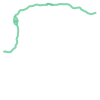

In [51]:
from shapely.ops import split, linemerge
lines = []
river_name = 'Río Paraná'
for line in gdf.loc[gdf['name']==river_name,'geometry'].values:
    lines.append(line)
Line = linemerge(lines)
Line

## Rio Parana, 105 Landsat images (download + analysis)

### Download images and extract graphs

In [26]:
import glob
from sklearn.cluster import KMeans

path_number = 226 # Rio Parana
row_number = 79
max_cloud_cover = 10
n_scenes_per_year = 3
download_images = False
river_name = 'Río Paraguay'

if download_images:
    for year in range(1984, 2013):
        start_date = str(year)+'-01-01'
        end_date =  str(year)+'-12-31'
        collection = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2") \
          .filterDate(start_date, end_date) \
          .filter(ee.Filter.eq('WRS_PATH', path_number)) \
          .filter(ee.Filter.eq('WRS_ROW', row_number)) \
          .filter(ee.Filter.lt("CLOUD_COVER", max_cloud_cover)) \
          .sort('CLOUD_COVER',True).limit(n_scenes_per_year)
        imgs = collection.toList(collection.size())
        for i in range(collection.size().getInfo()):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B2', 'SR_B5'])
            geemap.download_ee_image(mndwi, '/Users/zoltan/Dropbox/rivabar_data/'+tilename+'_mndwi.tif')
    
    for year in range(2013, 2022):
        start_date = str(year)+'-01-01'
        end_date =  str(year)+'-12-31'
        collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
          .filterDate(start_date, end_date) \
          .filter(ee.Filter.eq('WRS_PATH', path_number)) \
          .filter(ee.Filter.eq('WRS_ROW', row_number)) \
          .filter(ee.Filter.lt("CLOUD_COVER", max_cloud_cover)) \
          .sort('CLOUD_COVER',True).limit(n_scenes_per_year)
        imgs = collection.toList(collection.size())
        for i in range(collection.size().getInfo()):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            geemap.download_ee_image(mndwi, '/Users/zoltan/Dropbox/rivabar_data/'+tilename+'_mndwi.tif')
    
    for year in range(2021, 2023):
        start_date = str(year)+'-01-01'
        end_date =  str(year)+'-12-31'
        collection = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
          .filterDate(start_date, end_date) \
          .filter(ee.Filter.eq('WRS_PATH', path_number)) \
          .filter(ee.Filter.eq('WRS_ROW', row_number)) \
          .filter(ee.Filter.lt("CLOUD_COVER", max_cloud_cover)) \
          .sort('CLOUD_COVER',True).limit(n_scenes_per_year)
        imgs = collection.toList(collection.size())
        for i in range(collection.size().getInfo()):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            geemap.download_ee_image(mndwi, '/Users/zoltan/Dropbox/rivabar_data/'+tilename+'_mndwi.tif')

dirname = '/Users/zoltan/Dropbox/rivabar_data/'
fnames = []

for name in glob.glob('/Users/zoltan/Dropbox/rivabar_data/*' + f"{path_number:03d}" + f"{row_number:03d}" + '*.tif'):
    fnames.append(name.split('/')[-1])
fnames = sorted(fnames, key=lambda s: s[12:20])

im, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y = rb.read_and_plot_im(dirname, fnames[0])

# wrs2_gdf = geopandas.read_file('/Users/zoltan/Dropbox/rivabar/WRS2_descending_0/WRS2_descending.shp') 
# polygon = wrs2_gdf[(wrs2_gdf['PATH']==path_number) & (wrs2_gdf['ROW']==row_number)]['geometry'].values[0]
# gdf = ox.features_from_polygon(polygon, tags={'waterway': ['river', 'stream', 'tidal channel']})
# lines = []
# for line in gdf.loc[gdf['name']==river_name,'geometry'].values:
#     lines.append(line)
# Line = linemerge(lines)
# geoms = Line.intersection(polygon.exterior).geoms
# points = []
# for geom in geoms:
#     points.append((geom.xy[0][0], geom.xy[1][0]))

# # Convert the list of points into a numpy array
# data = np.array(points)
# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(data)
# # Get the coordinates of the cluster centers
# centroids = kmeans.cluster_centers_

# dem = ee.Image('USGS/SRTMGL1_003')
# poi1 = ee.Geometry.Point(list(centroids[0]))
# poi2 = ee.Geometry.Point(list(centroids[1]))
# scale = 10000 # scale in meters
# dem_poi1 = dem.sample(poi1, scale).first().get('elevation').getInfo()
# dem_poi2 = dem.sample(poi2, scale).first().get('elevation').getInfo()
# print(dem_poi1, dem_poi2)
# if dem_poi1 > dem_poi2:
#     start_point = 0
#     end_point = 1
# else:
#     start_point = 1
#     end_point = 0

# points_gs = geopandas.GeoSeries([Point(centroids[0]), Point(centroids[1])])
point0 = [-57.35586404800416, -27.36468802461247] # longitude, latitude
point1 = [-59.09495472908021, -28.220433108132823]
start_point = 0
end_point = 1
points_gs = geopandas.GeoSeries([Point(point0), Point(point1)])
points_gdf = geopandas.GeoDataFrame(geometry=points_gs)
points_gdf.crs = 'epsg:'+str(wrs2_gdf.crs.to_epsg())
points_gdf = points_gdf.to_crs(dataset.crs.data['init'])

start_x = points_gdf.loc[start_point, 'geometry'].xy[0][0]
start_y = points_gdf.loc[start_point, 'geometry'].xy[1][0]
end_x = points_gdf.loc[end_point, 'geometry'].xy[0][0]
end_y = points_gdf.loc[end_point, 'geometry'].xy[1][0]

G_rooks = []
D_primals = []
processed_tiles = []
problem_list = []

count = 0
for fname in fnames:
    process_file = True
    if process_file:
        print(fname)
        D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='water_index', ratio = 10,\
                ch_belt_smooth_factor=1e8, n_pixels_per_channel = 20, 
                remove_smaller_components=True, delete_pixels_polys = False)
        if len(G_rook) > 0:
            processed_tiles.append(fname)
            D_primals.append(D_primal)
            G_rooks.append(G_rook)
        count += 1
        print(str(count) + ' out of ' + str(len(fnames)) + ' processed')

LT05_226079_19850124_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:00<00:00, 5439.77it/s]


creating linestrings for primal graph


185it [00:04, 39.38it/s]


getting bank coordinates for the two main banks


100%|███████████████████████████████████████████████████████████████████████████████████████| 9011/9011 [00:00<00:00, 9815.08it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:20<00:00,  9.09it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 551/551 [00:05<00:00, 98.65it/s]


1 out of 106 processed
LT05_226079_19860127_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 5306.01it/s]


creating linestrings for primal graph


189it [00:04, 38.84it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8859/8859 [00:00<00:00, 18553.55it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:20<00:00,  9.18it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 552/552 [00:05<00:00, 100.09it/s]


2 out of 106 processed
LT05_226079_19860807_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 5217.78it/s]


creating linestrings for primal graph


180it [00:04, 39.01it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8620/8620 [00:00<00:00, 12278.34it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 178/178 [00:19<00:00,  8.94it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 532/532 [00:04<00:00, 107.47it/s]


3 out of 106 processed
LT05_226079_19860908_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 192/192 [00:00<00:00, 5420.35it/s]


creating linestrings for primal graph


194it [00:05, 36.99it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8874/8874 [00:00<00:00, 14136.09it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 192/192 [00:21<00:00,  8.76it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 570/570 [00:05<00:00, 103.12it/s]


4 out of 106 processed
LT05_226079_19870130_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 5115.51it/s]


creating linestrings for primal graph


186it [00:05, 36.75it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8637/8637 [00:00<00:00, 16054.38it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:21<00:00,  8.46it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 548/548 [00:05<00:00, 101.19it/s]


5 out of 106 processed
LT05_226079_19870215_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 5083.03it/s]


creating linestrings for primal graph


167it [00:03, 42.66it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8705/8705 [00:00<00:00, 10309.89it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:18<00:00,  8.81it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:04<00:00, 99.57it/s]


6 out of 106 processed
LT05_226079_19870303_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 5136.86it/s]


creating linestrings for primal graph


170it [00:04, 41.53it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8612/8612 [00:00<00:00, 12940.86it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:19<00:00,  8.83it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 503/503 [00:04<00:00, 102.06it/s]


7 out of 106 processed
LT05_226079_19880202_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 4693.40it/s]


creating linestrings for primal graph


173it [00:04, 38.86it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8839/8839 [00:00<00:00, 11774.36it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:21<00:00,  8.11it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 514/514 [00:05<00:00, 97.56it/s]


8 out of 106 processed
LT05_226079_19880218_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5065.98it/s]


creating linestrings for primal graph


174it [00:04, 39.24it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8601/8601 [00:00<00:00, 13451.11it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:21<00:00,  8.15it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 516/516 [00:05<00:00, 99.13it/s]


9 out of 106 processed
LT05_226079_19880305_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 4973.63it/s]


creating linestrings for primal graph


171it [00:04, 40.87it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8770/8770 [00:00<00:00, 15815.13it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:20<00:00,  8.11it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 503/503 [00:05<00:00, 100.52it/s]


10 out of 106 processed
LT05_226079_19890204_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 335/335 [00:00<00:00, 6111.78it/s]


creating linestrings for primal graph


337it [00:16, 20.49it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████████████████████████████████████████████████████| 10280/10280 [00:00<00:00, 12723.29it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 335/335 [00:36<00:00,  9.08it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 993/993 [00:10<00:00, 93.18it/s]


11 out of 106 processed
LT05_226079_19890324_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 5408.35it/s]


creating linestrings for primal graph


189it [00:04, 38.63it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9083/9083 [00:00<00:00, 14093.51it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:21<00:00,  8.61it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 556/556 [00:05<00:00, 100.94it/s]


12 out of 106 processed
LT05_226079_19890527_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 5294.22it/s]


creating linestrings for primal graph


175it [00:04, 41.16it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8498/8498 [00:00<00:00, 14764.06it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:19<00:00,  8.75it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:04<00:00, 109.67it/s]


13 out of 106 processed
LT05_226079_19900327_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5101.62it/s]


creating linestrings for primal graph


174it [00:04, 41.57it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8691/8691 [00:00<00:00, 19059.30it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:19<00:00,  8.81it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:04<00:00, 102.47it/s]


14 out of 106 processed
LT05_226079_19900615_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 418/418 [00:00<00:00, 6588.57it/s]


creating linestrings for primal graph


420it [00:26, 16.12it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████████████████████████████████████████████████████| 10574/10574 [00:00<00:00, 13504.70it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 418/418 [00:48<00:00,  8.59it/s]


setting half channel widths


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1243/1243 [00:15<00:00, 82.74it/s]


15 out of 106 processed
LT05_226079_19900802_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 5873.18it/s]


creating linestrings for primal graph


216it [00:06, 33.40it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8984/8984 [00:00<00:00, 14518.75it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:23<00:00,  9.22it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 642/642 [00:06<00:00, 103.85it/s]


16 out of 106 processed
LT05_226079_19910330_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 5126.18it/s]


creating linestrings for primal graph


172it [00:04, 40.82it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8650/8650 [00:00<00:00, 16776.05it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:19<00:00,  8.82it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:05<00:00, 101.51it/s]


17 out of 106 processed
LT05_226079_19911008_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
distance too large between nodes1 and nodes2
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 5553.62it/s]


creating linestrings for primal graph


82it [00:00, 85.67it/s] 


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 4408/4408 [00:00<00:00, 18803.45it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:08<00:00,  8.89it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 239/239 [00:01<00:00, 211.95it/s]


18 out of 106 processed
LT05_226079_19920417_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 5182.20it/s]


creating linestrings for primal graph


165it [00:03, 43.66it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8486/8486 [00:00<00:00, 14538.72it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:18<00:00,  8.72it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 484/484 [00:04<00:00, 102.23it/s]


19 out of 106 processed
LT05_226079_19920823_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 5142.22it/s]


creating linestrings for primal graph


158it [00:03, 45.62it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8565/8565 [00:00<00:00, 14986.84it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:17<00:00,  8.71it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 467/467 [00:04<00:00, 107.75it/s]


20 out of 106 processed
LT05_226079_19921213_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 5096.89it/s]


creating linestrings for primal graph


164it [00:03, 44.89it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8445/8445 [00:00<00:00, 14818.70it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:18<00:00,  8.64it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:04<00:00, 100.49it/s]


21 out of 106 processed
LT05_226079_19930215_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 5099.46it/s]


creating linestrings for primal graph


164it [00:03, 42.24it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8699/8699 [00:00<00:00, 14654.33it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:19<00:00,  8.16it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 485/485 [00:04<00:00, 104.14it/s]


22 out of 106 processed
LT05_226079_19930506_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 5234.61it/s]


creating linestrings for primal graph


169it [00:04, 41.69it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8614/8614 [00:00<00:00, 17283.87it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:19<00:00,  8.68it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 499/499 [00:04<00:00, 108.31it/s]


23 out of 106 processed
LT05_226079_19930927_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<00:00, 5263.17it/s]


creating linestrings for primal graph


179it [00:04, 40.28it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8934/8934 [00:00<00:00, 17410.04it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:20<00:00,  8.73it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 529/529 [00:04<00:00, 106.45it/s]


24 out of 106 processed
LT05_226079_19940101_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 5046.01it/s]


creating linestrings for primal graph


167it [00:03, 42.96it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8756/8756 [00:00<00:00, 17218.46it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:19<00:00,  8.65it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 496/496 [00:05<00:00, 98.45it/s]


25 out of 106 processed
LT05_226079_19940117_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<00:00, 5199.86it/s]


creating linestrings for primal graph


178it [00:04, 40.07it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8895/8895 [00:00<00:00, 17184.79it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:20<00:00,  8.58it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 525/525 [00:04<00:00, 106.51it/s]


26 out of 106 processed
LT05_226079_19941203_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5501.90it/s]


creating linestrings for primal graph


174it [00:04, 42.21it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9009/9009 [00:00<00:00, 16823.00it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:19<00:00,  9.01it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 518/518 [00:04<00:00, 105.37it/s]


27 out of 106 processed
LT05_226079_19950325_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5002.95it/s]


creating linestrings for primal graph


171it [00:04, 42.40it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9227/9227 [00:00<00:00, 14791.84it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:19<00:00,  8.86it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 504/504 [00:05<00:00, 96.72it/s]


28 out of 106 processed
LT05_226079_19950629_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 5314.85it/s]


creating linestrings for primal graph


181it [00:04, 38.00it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9016/9016 [00:00<00:00, 17670.26it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:21<00:00,  8.45it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 536/536 [00:05<00:00, 101.06it/s]


29 out of 106 processed
LT05_226079_19950917_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 5610.52it/s]


creating linestrings for primal graph


187it [00:05, 37.24it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8898/8898 [00:00<00:00, 18442.10it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:21<00:00,  8.45it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 553/553 [00:05<00:00, 102.26it/s]


30 out of 106 processed
LT05_226079_19960107_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 5345.17it/s]


creating linestrings for primal graph


167it [00:03, 42.52it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8567/8567 [00:00<00:00, 18559.44it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:19<00:00,  8.33it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 490/490 [00:04<00:00, 105.42it/s]


31 out of 106 processed
LT05_226079_19960802_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 4967.19it/s]


creating linestrings for primal graph


161it [00:03, 42.78it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8715/8715 [00:00<00:00, 18985.19it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:18<00:00,  8.41it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 473/473 [00:04<00:00, 103.01it/s]


32 out of 106 processed
LT05_226079_19960818_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 5168.21it/s]


creating linestrings for primal graph


165it [00:03, 42.17it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8809/8809 [00:00<00:00, 18378.92it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:19<00:00,  8.42it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 484/484 [00:04<00:00, 103.54it/s]


33 out of 106 processed
LT05_226079_19970330_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<00:00, 4964.88it/s]


creating linestrings for primal graph


178it [00:04, 37.85it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8992/8992 [00:00<00:00, 16149.39it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:21<00:00,  8.27it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 529/529 [00:05<00:00, 96.09it/s]


34 out of 106 processed
LT05_226079_19970805_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 5128.37it/s]


creating linestrings for primal graph


163it [00:03, 42.16it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8809/8809 [00:00<00:00, 15283.05it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:19<00:00,  8.25it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 479/479 [00:04<00:00, 103.87it/s]


35 out of 106 processed
LT05_226079_19970906_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 5134.56it/s]


creating linestrings for primal graph


172it [00:04, 40.45it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8740/8740 [00:00<00:00, 16075.66it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:20<00:00,  8.30it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 507/507 [00:04<00:00, 103.51it/s]


36 out of 106 processed
LT05_226079_19980301_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 5122.44it/s]


creating linestrings for primal graph


170it [00:04, 41.00it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8707/8707 [00:00<00:00, 14556.21it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:20<00:00,  8.32it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 501/501 [00:04<00:00, 101.16it/s]


37 out of 106 processed
LT05_226079_19980402_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 278/278 [00:00<00:00, 5648.68it/s]


creating linestrings for primal graph


280it [00:11, 24.53it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9025/9025 [00:00<00:00, 14820.39it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 278/278 [00:32<00:00,  8.46it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 828/828 [00:08<00:00, 97.24it/s]


38 out of 106 processed
LT05_226079_19980621_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:00<00:00, 5174.73it/s]


creating linestrings for primal graph


140it [00:02, 48.55it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 7994/7994 [00:00<00:00, 15025.69it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:16<00:00,  8.17it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 414/414 [00:03<00:00, 116.31it/s]


39 out of 106 processed
LT05_226079_19990131_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<00:00, 4980.08it/s]


creating linestrings for primal graph


178it [00:04, 38.89it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9098/9098 [00:00<00:00, 14605.65it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:21<00:00,  8.30it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 524/524 [00:05<00:00, 98.74it/s]


40 out of 106 processed
LT05_226079_19990507_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 5348.98it/s]


creating linestrings for primal graph


169it [00:04, 41.53it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8789/8789 [00:00<00:00, 15366.59it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:19<00:00,  8.63it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 497/497 [00:04<00:00, 104.71it/s]


41 out of 106 processed
LT05_226079_19990811_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5449.25it/s]


creating linestrings for primal graph


174it [00:04, 41.99it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8601/8601 [00:00<00:00, 16041.55it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:18<00:00,  9.38it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 515/515 [00:04<00:00, 109.29it/s]


42 out of 106 processed
LT05_226079_20000102_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 5309.95it/s]


creating linestrings for primal graph


155it [00:03, 46.58it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8619/8619 [00:00<00:00, 18422.77it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:16<00:00,  9.46it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 457/457 [00:04<00:00, 109.92it/s]


43 out of 106 processed
LT05_226079_20000423_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<00:00, 5491.76it/s]


creating linestrings for primal graph


178it [00:04, 40.80it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8637/8637 [00:00<00:00, 16924.54it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:18<00:00,  9.30it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 523/523 [00:04<00:00, 108.51it/s]


44 out of 106 processed
LT05_226079_20000930_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 5296.75it/s]


creating linestrings for primal graph


164it [00:03, 43.36it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8559/8559 [00:00<00:00, 14579.45it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:17<00:00,  9.13it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 483/483 [00:04<00:00, 110.49it/s]


45 out of 106 processed
LT05_226079_20010731_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
distance too large between nodes1 and nodes2
path is too short!
finding nodes that are within a certain radius of the path


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15968.16it/s]

main path is too short
46 out of 106 processed
LT05_226079_20011019_mndwi.tif


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 5267.34it/s]


creating linestrings for primal graph


167it [00:03, 43.90it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8765/8765 [00:00<00:00, 16426.10it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:17<00:00,  9.21it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 492/492 [00:04<00:00, 103.91it/s]


47 out of 106 processed
LT05_226079_20011104_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5666.06it/s]


creating linestrings for primal graph


174it [00:04, 42.22it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8686/8686 [00:00<00:00, 18145.96it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:18<00:00,  9.53it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 516/516 [00:04<00:00, 108.49it/s]


48 out of 106 processed
LT05_226079_20020224_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 5354.35it/s]


creating linestrings for primal graph


176it [00:04, 42.05it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8843/8843 [00:00<00:00, 15410.16it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:18<00:00,  9.18it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:04<00:00, 107.07it/s]


49 out of 106 processed
LT05_226079_20030806_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 5457.92it/s]


creating linestrings for primal graph


175it [00:04, 41.71it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8714/8714 [00:00<00:00, 18030.33it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:18<00:00,  9.45it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 514/514 [00:04<00:00, 107.34it/s]


50 out of 106 processed
LT05_226079_20030923_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 5452.95it/s]


creating linestrings for primal graph


162it [00:03, 45.22it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8649/8649 [00:00<00:00, 17963.67it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:16<00:00,  9.43it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 473/473 [00:04<00:00, 109.15it/s]


51 out of 106 processed
LT05_226079_20040129_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 5257.69it/s]


creating linestrings for primal graph


164it [00:03, 44.60it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8843/8843 [00:00<00:00, 16129.03it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:17<00:00,  9.14it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 484/484 [00:04<00:00, 106.53it/s]


52 out of 106 processed
LT05_226079_20040317_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 5532.67it/s]


creating linestrings for primal graph


167it [00:03, 44.76it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8780/8780 [00:00<00:00, 16683.42it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:17<00:00,  9.36it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 488/488 [00:04<00:00, 107.71it/s]


53 out of 106 processed
LT05_226079_20040808_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 5392.09it/s]


creating linestrings for primal graph


169it [00:03, 43.00it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8754/8754 [00:00<00:00, 15933.63it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:17<00:00,  9.32it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 498/498 [00:04<00:00, 107.66it/s]


54 out of 106 processed
LT05_226079_20050216_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 5353.17it/s]


creating linestrings for primal graph


166it [00:03, 43.31it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8635/8635 [00:00<00:00, 14132.41it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 164/164 [00:18<00:00,  9.10it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 491/491 [00:04<00:00, 106.68it/s]


55 out of 106 processed
LT05_226079_20050304_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 5379.01it/s]


creating linestrings for primal graph


173it [00:04, 42.28it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8810/8810 [00:00<00:00, 16833.05it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:18<00:00,  9.29it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 508/508 [00:04<00:00, 106.33it/s]


56 out of 106 processed
LT05_226079_20050320_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 181/181 [00:00<00:00, 5563.31it/s]


creating linestrings for primal graph


183it [00:04, 39.66it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8705/8705 [00:00<00:00, 16450.32it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 181/181 [00:19<00:00,  9.36it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 539/539 [00:05<00:00, 107.57it/s]


57 out of 106 processed
LT05_226079_20060219_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 5591.73it/s]


creating linestrings for primal graph


190it [00:04, 38.20it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8990/8990 [00:00<00:00, 16445.02it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:21<00:00,  8.71it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 562/562 [00:05<00:00, 104.47it/s]


58 out of 106 processed
LT05_226079_20060307_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 5257.08it/s]


creating linestrings for primal graph


157it [00:03, 46.64it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8789/8789 [00:00<00:00, 15290.11it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:17<00:00,  8.70it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 460/460 [00:04<00:00, 106.16it/s]


59 out of 106 processed
LT05_226079_20060424_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 5148.49it/s]


creating linestrings for primal graph


161it [00:03, 45.24it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8830/8830 [00:00<00:00, 15101.81it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:18<00:00,  8.40it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 469/469 [00:04<00:00, 103.71it/s]


60 out of 106 processed
LT05_226079_20070801_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 5298.86it/s]


creating linestrings for primal graph


188it [00:04, 37.88it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9059/9059 [00:00<00:00, 15826.76it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 186/186 [00:21<00:00,  8.63it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 551/551 [00:05<00:00, 103.54it/s]


61 out of 106 processed
LT05_226079_20070902_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 5327.14it/s]


creating linestrings for primal graph


187it [00:04, 38.38it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9036/9036 [00:00<00:00, 17307.59it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:21<00:00,  8.68it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:05<00:00, 103.70it/s]


62 out of 106 processed
LT05_226079_20071004_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
distance too large between nodes1 and nodes2
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 3912.60it/s]


creating linestrings for primal graph


7it [00:00, 274.10it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 2456/2456 [00:00<00:00, 43008.62it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.69it/s]


setting half channel widths


100%|████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 333.74it/s]


63 out of 106 processed
LT05_226079_20081006_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 5420.04it/s]


creating linestrings for primal graph


190it [00:04, 38.10it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9073/9073 [00:00<00:00, 17081.68it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:21<00:00,  8.94it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 560/560 [00:05<00:00, 100.08it/s]


64 out of 106 processed
LT05_226079_20081123_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5475.59it/s]


creating linestrings for primal graph


174it [00:04, 40.95it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8997/8997 [00:00<00:00, 15946.41it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:20<00:00,  8.28it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 509/509 [00:04<00:00, 102.77it/s]


65 out of 106 processed
LT05_226079_20090315_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5172.64it/s]


creating linestrings for primal graph


171it [00:04, 40.98it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8743/8743 [00:00<00:00, 15899.66it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:20<00:00,  8.17it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 501/501 [00:04<00:00, 103.70it/s]


66 out of 106 processed
LT05_226079_20090416_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<00:00, 5158.04it/s]


creating linestrings for primal graph


192it [00:05, 36.65it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8980/8980 [00:00<00:00, 17118.29it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:23<00:00,  8.21it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 566/566 [00:05<00:00, 102.44it/s]


67 out of 106 processed
LT05_226079_20090822_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 5088.90it/s]


creating linestrings for primal graph


162it [00:03, 43.08it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8735/8735 [00:00<00:00, 15358.57it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:19<00:00,  8.16it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 478/478 [00:04<00:00, 104.73it/s]


68 out of 106 processed
LT05_226079_20100129_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 371/371 [00:00<00:00, 6101.66it/s]


creating linestrings for primal graph


373it [00:20, 18.13it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9674/9674 [00:00<00:00, 12953.10it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 371/371 [00:43<00:00,  8.47it/s]


setting half channel widths


100%|█████████████████████████████████████████████████████████████████████████████████████████| 1098/1098 [00:12<00:00, 89.39it/s]


69 out of 106 processed
LT05_226079_20101028_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 5496.28it/s]


creating linestrings for primal graph


173it [00:04, 42.63it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8959/8959 [00:00<00:00, 16804.79it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:19<00:00,  8.68it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 506/506 [00:05<00:00, 100.92it/s]


70 out of 106 processed
LT05_226079_20101113_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<00:00, 5412.70it/s]


creating linestrings for primal graph


163it [00:03, 45.79it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8812/8812 [00:00<00:00, 16947.10it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:18<00:00,  8.61it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 477/477 [00:04<00:00, 105.25it/s]


71 out of 106 processed
LT05_226079_20110116_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 5412.92it/s]


creating linestrings for primal graph


177it [00:04, 41.69it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9031/9031 [00:00<00:00, 16170.28it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:20<00:00,  8.63it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 520/520 [00:05<00:00, 103.95it/s]


72 out of 106 processed
LT05_226079_20110406_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 5235.34it/s]


creating linestrings for primal graph


199it [00:05, 36.14it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9020/9020 [00:00<00:00, 13347.90it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:23<00:00,  8.26it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 585/585 [00:05<00:00, 99.16it/s]


73 out of 106 processed
LT05_226079_20110812_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:00<00:00, 5683.07it/s]


creating linestrings for primal graph


206it [00:05, 35.40it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9068/9068 [00:00<00:00, 13909.23it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:24<00:00,  8.36it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 614/614 [00:05<00:00, 103.10it/s]


74 out of 106 processed
LC08_226079_20130817_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5370.71it/s]


creating linestrings for primal graph


171it [00:04, 42.22it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8741/8741 [00:00<00:00, 15741.49it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:20<00:00,  8.21it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 501/501 [00:04<00:00, 105.73it/s]


75 out of 106 processed
LC08_226079_20131105_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 5000.60it/s]


creating linestrings for primal graph


169it [00:04, 42.03it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8867/8867 [00:00<00:00, 15668.90it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:20<00:00,  8.17it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 498/498 [00:04<00:00, 104.87it/s]


76 out of 106 processed
LC08_226079_20131223_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 5244.89it/s]


creating linestrings for primal graph


162it [00:03, 45.07it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8812/8812 [00:00<00:00, 16220.29it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:19<00:00,  8.23it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 473/473 [00:04<00:00, 105.22it/s]


77 out of 106 processed
LC08_226079_20140313_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 5229.69it/s]


creating linestrings for primal graph


169it [00:03, 43.08it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9130/9130 [00:00<00:00, 17002.82it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:19<00:00,  8.38it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 497/497 [00:04<00:00, 104.12it/s]


78 out of 106 processed
LC08_226079_20140820_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5264.61it/s]


creating linestrings for primal graph


171it [00:04, 42.50it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8805/8805 [00:00<00:00, 15762.43it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:20<00:00,  8.34it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 504/504 [00:04<00:00, 105.01it/s]


79 out of 106 processed
LC08_226079_20140921_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5067.47it/s]


creating linestrings for primal graph


174it [00:04, 40.18it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9065/9065 [00:00<00:00, 15876.41it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:21<00:00,  7.96it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 517/517 [00:05<00:00, 102.87it/s]


80 out of 106 processed
LC08_226079_20150316_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 5370.43it/s]


creating linestrings for primal graph


171it [00:04, 42.00it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9103/9103 [00:00<00:00, 15480.97it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:21<00:00,  7.92it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 499/499 [00:04<00:00, 101.65it/s]


81 out of 106 processed
LC08_226079_20150401_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 5157.63it/s]


creating linestrings for primal graph


181it [00:04, 38.91it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9099/9099 [00:00<00:00, 15808.19it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:22<00:00,  7.96it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 531/531 [00:05<00:00, 103.00it/s]


82 out of 106 processed
LC08_226079_20150519_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 5197.33it/s]


creating linestrings for primal graph


170it [00:04, 41.55it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8771/8771 [00:00<00:00, 16478.35it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:20<00:00,  8.13it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 499/499 [00:04<00:00, 105.11it/s]


83 out of 106 processed
LC08_226079_20160809_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 5031.52it/s]


creating linestrings for primal graph


177it [00:04, 39.03it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8924/8924 [00:00<00:00, 16616.02it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:22<00:00,  7.90it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 519/519 [00:05<00:00, 103.75it/s]


84 out of 106 processed
LC08_226079_20160825_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 5063.32it/s]


creating linestrings for primal graph


164it [00:03, 42.69it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9509/9509 [00:00<00:00, 15470.19it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:19<00:00,  8.13it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 476/476 [00:04<00:00, 100.96it/s]


85 out of 106 processed
LC08_226079_20160910_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 5191.81it/s]


creating linestrings for primal graph


177it [00:04, 39.47it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9348/9348 [00:00<00:00, 15802.79it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:21<00:00,  8.00it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 518/518 [00:05<00:00, 102.56it/s]


86 out of 106 processed
LC08_226079_20170422_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 5213.63it/s]


creating linestrings for primal graph


176it [00:04, 40.75it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9144/9144 [00:00<00:00, 15256.22it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:21<00:00,  8.12it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 518/518 [00:04<00:00, 103.92it/s]


87 out of 106 processed
LC08_226079_20170727_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 5414.08it/s]


creating linestrings for primal graph


191it [00:05, 37.35it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8939/8939 [00:00<00:00, 16364.90it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:22<00:00,  8.25it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 562/562 [00:05<00:00, 104.43it/s]


88 out of 106 processed
LC08_226079_20171031_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 5197.48it/s]


creating linestrings for primal graph


164it [00:03, 44.81it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8832/8832 [00:00<00:00, 15096.28it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:19<00:00,  8.14it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 478/478 [00:04<00:00, 101.45it/s]


89 out of 106 processed
LC08_226079_20180103_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5046.80it/s]


creating linestrings for primal graph


174it [00:04, 38.91it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9434/9434 [00:00<00:00, 14956.23it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:22<00:00,  7.69it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 515/515 [00:05<00:00, 98.74it/s]


90 out of 106 processed
LC08_226079_20180204_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 4953.89it/s]


creating linestrings for primal graph


168it [00:04, 40.28it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9047/9047 [00:00<00:00, 13433.23it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:21<00:00,  7.73it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 496/496 [00:04<00:00, 100.88it/s]


91 out of 106 processed
LC08_226079_20180714_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 5210.28it/s]


creating linestrings for primal graph


182it [00:04, 38.73it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8906/8906 [00:00<00:00, 17539.79it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:22<00:00,  7.98it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 533/533 [00:05<00:00, 105.22it/s]


92 out of 106 processed
LC08_226079_20190514_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<00:00, 5096.32it/s]


creating linestrings for primal graph


157it [00:03, 45.05it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8803/8803 [00:00<00:00, 14397.35it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:19<00:00,  8.10it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 459/459 [00:04<00:00, 105.96it/s]


93 out of 106 processed
LC08_226079_20190717_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 5346.62it/s]


creating linestrings for primal graph


182it [00:04, 39.37it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8984/8984 [00:00<00:00, 17175.10it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:21<00:00,  8.20it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 538/538 [00:05<00:00, 102.37it/s]


94 out of 106 processed
LC08_226079_20190802_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 5219.93it/s]


creating linestrings for primal graph


182it [00:04, 38.72it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8901/8901 [00:00<00:00, 16534.03it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:21<00:00,  8.24it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 536/536 [00:05<00:00, 102.87it/s]


95 out of 106 processed
LC08_226079_20200226_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 5465.48it/s]


creating linestrings for primal graph


189it [00:04, 38.42it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9008/9008 [00:00<00:00, 16966.32it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:22<00:00,  8.41it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 556/556 [00:05<00:00, 102.55it/s]


96 out of 106 processed
LC08_226079_20200414_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 5354.76it/s]


creating linestrings for primal graph


170it [00:04, 41.06it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8827/8827 [00:00<00:00, 18724.51it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:19<00:00,  8.43it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 502/502 [00:04<00:00, 105.51it/s]


97 out of 106 processed
LC08_226079_20200719_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 5414.49it/s]


creating linestrings for primal graph


182it [00:04, 39.27it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8833/8833 [00:00<00:00, 18232.49it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:22<00:00,  7.87it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 538/538 [00:05<00:00, 104.24it/s]


98 out of 106 processed
LC08_226079_20210228_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 5304.54it/s]


creating linestrings for primal graph


176it [00:04, 40.38it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9089/9089 [00:00<00:00, 16094.27it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:21<00:00,  8.14it/s]


setting half channel widths


100%|███████████████████████████████████████████████████████████████████████████████████████████| 521/521 [00:05<00:00, 97.85it/s]


99 out of 106 processed
LC08_226079_20210401_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 5349.56it/s]


creating linestrings for primal graph


176it [00:04, 41.64it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9121/9121 [00:00<00:00, 16989.57it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:21<00:00,  8.24it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 515/515 [00:04<00:00, 104.32it/s]


100 out of 106 processed
LC08_226079_20210807_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 5455.61it/s]


creating linestrings for primal graph


146it [00:02, 51.03it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9029/9029 [00:00<00:00, 20882.38it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:17<00:00,  8.44it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 429/429 [00:04<00:00, 105.40it/s]


101 out of 106 processed
LC09_226079_20211205_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 5210.78it/s]


creating linestrings for primal graph


170it [00:03, 42.98it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8891/8891 [00:00<00:00, 19148.92it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:20<00:00,  8.33it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 496/496 [00:04<00:00, 106.44it/s]


102 out of 106 processed
LC09_226079_20211221_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 5359.10it/s]


creating linestrings for primal graph


174it [00:04, 42.20it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8865/8865 [00:00<00:00, 19733.45it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:20<00:00,  8.50it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:04<00:00, 107.04it/s]


103 out of 106 processed
LC09_226079_20220122_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 5408.45it/s]


creating linestrings for primal graph


155it [00:03, 46.54it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8778/8778 [00:00<00:00, 20223.11it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:18<00:00,  8.37it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 455/455 [00:04<00:00, 106.96it/s]


104 out of 106 processed
LC09_226079_20220223_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 5373.73it/s]


creating linestrings for primal graph


156it [00:03, 44.93it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 8818/8818 [00:00<00:00, 19876.73it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:18<00:00,  8.20it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 463/463 [00:04<00:00, 106.55it/s]


105 out of 106 processed
LC09_226079_20221106_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 5325.67it/s]


creating linestrings for primal graph


176it [00:04, 40.73it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████████████████████████████████████████████████████████| 9007/9007 [00:00<00:00, 14495.09it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:21<00:00,  8.09it/s]


setting half channel widths


100%|██████████████████████████████████████████████████████████████████████████████████████████| 522/522 [00:04<00:00, 105.73it/s]


106 out of 106 processed


### Smooth bank polygons

In [43]:
from shapely.geometry import Polygon
from tqdm import tqdm

for G_rook in tqdm(G_rooks):
    for node in G_rook.nodes:
        if node > 1:
            x = G_rook.nodes()[node]['bank_polygon'].exterior.xy[0]
            y = G_rook.nodes()[node]['bank_polygon'].exterior.xy[1]
            x, y = rb.smooth_line(x, y, spline_ds = 10, spline_smoothing = 1000, savgol_window = min(11, len(x)), savgol_poly_order = 3)
            G_rook.nodes()[node]['bank_polygon_smooth'] = Polygon(list(zip(x, y)))
        else:
            x = G_rook.nodes()[node]['bank_polygon'].exterior.xy[0]
            y = G_rook.nodes()[node]['bank_polygon'].exterior.xy[1]
            # need to remove the last point from x and y for the smoothing to work:
            xs, ys = rb.smooth_line(x[:-1], y[:-1], spline_ds = 10, spline_smoothing = 1000, savgol_window = min(11, len(x)), savgol_poly_order = 3)
            G_rook.nodes()[node]['bank_polygon_smooth'] = Polygon(list(zip(xs, ys)))

100%|███████████████████████████████████████████████████████████████████████████████████████████| 105/105 [32:32<00:00, 18.60s/it]


### Create geodataframe with all polygons

In [44]:
bank_polys = []
year = []
month = []
day = []
bank_type = []
for j in range(len(G_rooks)):
    if len(G_rook) > 0:
        for i in range(0, len(G_rooks[j])):
            bank_polys.append(G_rooks[j].nodes()[i]['bank_polygon_smooth'])
            year.append(int(processed_tiles[j][12:20][:4]))
            month.append(int(processed_tiles[j][12:20][4:6]))
            day.append(int(int(processed_tiles[j][12:20][6:])))             
            if i == 0:
                bank_type.append(0)
            elif i == 1:
                bank_type.append(1)
            else:
                bank_type.append(2)
gdf = geopandas.GeoDataFrame(bank_polys, columns = ['geometry'])
gdf['year'] = year
gdf['month'] = month
gdf['day'] = day
gdf['date'] = pd.to_datetime(gdf[['year', 'month', 'day']])
gdf['timedelta'] = gdf['date'] - gdf['date'].min()
gdf['n_days'] = gdf['timedelta'].dt.days
gdf['length'] = gdf.length
gdf['type'] = bank_type
# gdf.drop(['date', 'timedelta'], axis=1, inplace=True)
gdf.crs = 'epsg:'+str(dataset.crs.to_epsg())
gdf = gdf.sort_values(by='date')
gdf = gdf.reset_index(drop=True)
for i in range(0, len(gdf.geometry)):
    if not gdf.geometry[i].is_valid:
        gdf.geometry[i] = gdf.geometry[i].buffer(0)
gdf.head()

,geometry,year,month,day,date,timedelta,n_days,length,type
0,"POLYGON ((247044.668 -3136183.987, 247044.692 ...",1985,1,24,1985-01-24,0 days,0,1.006865e+06,0
1,"POLYGON ((317162.471 -3037546.425, 317152.496 ...",1985,1,24,1985-01-24,0 days,0,1.958982e+04,2
2,"POLYGON ((321601.809 -3035560.798, 321594.294 ...",1985,1,24,1985-01-24,0 days,0,1.032377e+04,2
3,"POLYGON ((324474.128 -3034337.145, 324472.456 ...",1985,1,24,1985-01-24,0 days,0,4.936608e+03,2
4,"POLYGON ((320724.371 -3034849.694, 320712.179 ...",1985,1,24,1985-01-24,0 days,0,3.093883e+03,2


### Convert geodataframe to southern UTM zone

In [48]:
import rasterio
import pyproj
from rasterio.crs import CRS
import cartopy.crs as ccrs

gdf = gdf.to_crs('epsg:32721') # convert geodataframe to southern UTM zone

# need to convert the original UTM bounds of the image to the new ones:
transformer = pyproj.Transformer.from_crs(CRS.from_epsg(32621), CRS.from_epsg(32721)) #, always_xy=True)
left_utm_x1, lower_utm_y1 = transformer.transform(left_utm_x, lower_utm_y)
right_utm_x1, upper_utm_y1 = transformer.transform(right_utm_x, upper_utm_y)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.epsg(32721)) # for the southern hemisphere, we need the southern UTM zone so that cartopy doesn't get confused
ax.imshow(mndwi, extent=[left_utm_x1, right_utm_x1, lower_utm_y1, upper_utm_y1], cmap='Blues', alpha=0.8) #, transform=ccrs.epsg(32621))
ax.set_xlim(left_utm_x1, right_utm_x1)
ax.set_ylim(lower_utm_y1, upper_utm_y1)

(6848785.0, 7080415.0)

### Use 'ginput' to define area of interest for plotting

In [50]:
plt.ginput(1)

[(324910.38638620597, 6939368.01615961)]

### Plot summary of migration

In [151]:
import matplotlib.colors as mcolors
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker

xmin = 304895.671
xmax = 324910.386
ymin = 6939368.016
ymax = 6964461.091

aoi_poly = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])
inds = [index for index, row in gdf.iterrows() if row.geometry.overlaps(aoi_poly) or row.geometry.intersects(aoi_poly)]
gdf1 = gdf.loc[inds]
gdf1 = gdf1.sort_values(by = 'date')
gdf1.reset_index(drop=True, inplace=True)

xrange = xmax-xmin
yrange = ymax-ymin

colormap = plt.get_cmap('RdBu')
unique_n_days = gdf1.n_days.unique()
count = 0
# for end_time in unique_n_days:
end_time = unique_n_days[-1]
norm = mcolors.Normalize(vmin=0, vmax=end_time)
n_tiles = len(gdf1[gdf1.n_days <= end_time].n_days.unique())
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.epsg(32721))
for i in tqdm(gdf1[gdf1.n_days <= end_time].index):
    ind = np.where(unique_n_days == gdf1['n_days'][i])[0][0]
    # if ~outliers[ind] and ch_areas[ind]/1e6 < 260 and ch_areas[ind]/1e6 > 220: # filter out droughts and large floods
    if type(gdf1.geometry[i]) == Polygon:
        ax.fill(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color=colormap(norm(gdf1['n_days'][i])), zorder=gdf1['n_days'][i], alpha=1/n_tiles)
        ax.plot(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color='k', zorder=gdf1['n_days'][i], linewidth=0.05)
        if gdf1.n_days[i] != end_time:
            ax.plot(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color='k', zorder=gdf1['n_days'][i], linewidth=0.05)
        else:
            ax.plot(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color='k', zorder=gdf1['n_days'][i], linewidth=1.0)
            
# draw lat/lon gridlines:
transformer = pyproj.Transformer.from_crs(CRS.from_epsg(32721), CRS.from_epsg(4326), always_xy=True)
lonmin, latmin = transformer.transform(xmin, ymin)
lonmax, latmax = transformer.transform(xmax, ymax)
lons = rb.find_numbers_between(lonmin, lonmax, 1)
lats = rb.find_numbers_between(latmin, latmax, 1)
ax.gridlines(draw_labels=True, xlocs = mticker.FixedLocator(lons), ylocs = mticker.FixedLocator(lats), color='k', linewidth=0.5, zorder=gdf1.n_days.max()+1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.text(xmin+380, ymax-900, gdf1[gdf1.n_days == end_time].date.iloc[0].strftime("%Y/%m/%d"), fontsize=14, zorder=gdf1.n_days.max()+1)
scalebar = ScaleBar(1.0, "m", length_fraction=0.25, location='lower right', box_color="white", pad=0.5)
scalebar.zorder = gdf1.n_days.max()+1
# ax.arrow(xmin+xrange*1/6, ymin-200+yrange*2/3, 0, -1000, width=60, length_includes_head=True, linewidth=None, zorder=gdf1.n_days.max()+1, color='k')
# ax.text(xmin+xrange*1/6-500, ymin-200+yrange*2/3+150, 'flow', fontsize=13, zorder=gdf1.n_days.max()+1)
ax.add_artist(scalebar)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 2200/2200 [03:01<00:00, 12.11it/s]


### Look at relationship between channel areas and bar areas

In [84]:
reload(rb)
dates, all_bars, chs, ch_belts, bar_areas, ch_areas = rb.get_ch_and_bar_areas(gdf, xmin, xmax, ymin, ymax)

plt.figure()
plt.scatter(np.array(ch_areas)/1e6, np.array(bar_areas)/1e6, c=gdf.date.unique(), s=50, edgecolor='k')
plt.xlabel('channel area (km2)')
plt.ylabel('bar area (km2)')
plt.colorbar();

plt.figure()
plt.plot(gdf.date.unique(), np.array(bar_areas)/1e6, '.-', label='bars')
plt.plot(gdf.date.unique(), np.array(ch_areas)/1e6, '.-', label='channel')
plt.plot(gdf.date.unique(), np.array(ch_areas)/1e6 + np.array(bar_areas)/1e6, '.-');
plt.ylabel('area (km2)')
plt.legend();

100%|███████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:15<00:00,  6.87it/s]


### Save geodataframe to shapefile

In [196]:
gdf.drop(['date', 'timedelta'], axis=1, inplace=True)
gdf.to_file(dirname + 'Paraguay_226_078_bank_polygons.shp')